In [105]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
import numpy as np

df=pd.read_csv('train.csv')
le = LabelEncoder()
df.Sex=le.fit_transform(df['Sex'])
ohe = OneHotEncoder()
res = ohe.fit_transform(df['Embarked'].fillna(value="").to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res.toarray(), columns=ohe.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1).drop(columns='Embarked')

y = 1 - df["Survived"]
X = df.drop(columns=['PassengerId','Survived','Name',	'Ticket',	'Cabin']).fillna(value=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010, test_size=0.25)

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train).score(X_train, y_train)



0.7919161676646707

В качестве метрики была выбрана F1-метрика, поскольку у нас бинарная классификация, данная метрика не такая наивная, как accuracy, объединяет в себе precision и recall и нет особой разницы в том что нам важнее - не признать ошибочно выжившим или признать ошибочно умершим. Для визуализации распределения ошибок была построена, ROC-кривая

In [106]:
#@title metrics
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')



F1-score for Dummy Classificator: 0.552
F1-score for Logistic regression: 0.844106463878327


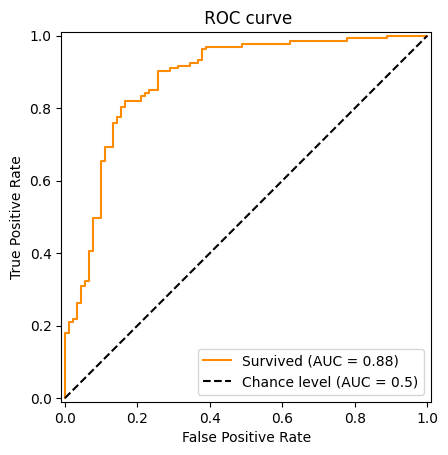

In [104]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred,
    name="Survived",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=" ROC curve",
)